In [98]:
import pandas as pd
import os

## Merging 12 Months of sales data into a single file

In [99]:
sales_data_directory = "Sales_Data"
monthly_data_files = os.listdir(sales_data_directory)

In [100]:
monthly_data_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [101]:
yearly_data = pd.DataFrame()
for file in monthly_data_files:
    path = os.path.join(sales_data_directory, file)
    month_data = pd.read_csv(path)
    yearly_data = pd.concat([month_data, yearly_data])

In [102]:
yearly_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [103]:
yearly_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [104]:
yearly_data.to_csv("yearly_data.csv", index=False)

## Read from the newly saved yearly data.

In [106]:
df = pd.read_csv("yearly_data.csv")

In [107]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


## Question 1: What was the best month for sales? How much money was earned that month?

In [108]:
df["Month"] = df["Order Date"].str[0:2]
# df["Month"] = df["Month"].astype("int32")

# The above line causes error due to NaN values, and string values (Since they cannot be converted to int)

### Clean the data

In [109]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df = df.dropna(how='all') # Drop rows that have all of its column values as NAN

In [111]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09
...,...,...,...,...,...,...,...
186844,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001",04
186845,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301",04
186846,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016",04
186847,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035",04


In [112]:
temp_df = df[df["Order Date"].str[0:2] == 'Or']

In [113]:
temp_df.head() # These columns need to be removed

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [116]:
df = df[df["Order Date"].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


### Add new columns and change the data type to appropriate type

In [117]:
# df["Month"] = df["Month"].astype("int32")
# df["Quantity Ordered"] = df["Quantity Ordered"].astype("int32")
# df["Price Each"] = df["Price Each"].astype("float32")

# A better way to convert
df["Month"] = pd.to_numeric(df["Month"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [118]:
df["Total Price"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


### Now actually solving the question

In [119]:
results = df.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Total Price
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


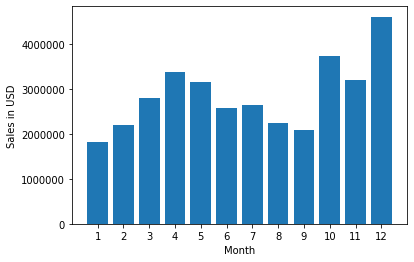

In [120]:
import matplotlib.pyplot as plt

months = range(1, 13)
plt.bar(months, results['Total Price'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.ticklabel_format(style='plain', axis='y') # To prevent scientific notation.

### December had the best sales in the year 2019

## Question 2: What city had the highest number of sales

In [121]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


### Adding a city column

In [122]:
def get_city_and_state(address):
    address = address.split(',')
    city = address[1]
    state = address[2].split()[0]
    return f'{city}, {state}'.strip()

# df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

# Can be done using function as well
df["City"] = df["Purchase Address"].apply(get_city_and_state)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA"


### Grouping

In [123]:
results = df.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Total Price
City,,,,
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Austin, TX",11153,1809873.61,69829,1819581.75
"Boston, MA",22528,3637409.77,141112,3661642.01
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Portland, ME",2750,447189.25,17144,449758.27
"Portland, OR",11303,1860558.22,70621,1870732.34
"San Francisco, CA",50239,8211461.74,315520,8262203.91


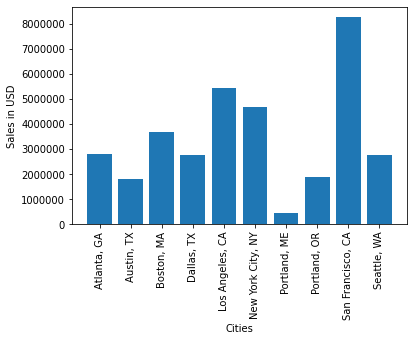

In [124]:
cities = [city for city, dataframe in df.groupby("City")]
# citites = results.index # This will yield same results as above

plt.bar(cities, results['Total Price'])
plt.xticks(cities, rotation=90)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.ticklabel_format(style='plain', axis='y') # To prevent scientific notation on only y axis

### San Francisco had the best sales

## Question 3: What time should we display advertisements to maximize liklihood of customer's buying product?

In [125]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA"


In [126]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA"


In [127]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA",14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX",10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA",17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA",7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA",19,3


In [131]:
results = df.groupby(['Hour']).count()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


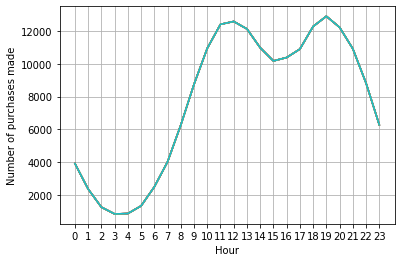

In [132]:
hours = results.index

plt.plot(hours, results)
plt.xticks(hours)
plt.ylabel('Number of purchases made')
plt.xlabel('Hour')
plt.grid()
plt.show()

### 11-12 AM and 6-8pm seems like a good time to advertise

## Question 4: What products are most often sold together?

In [133]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA",14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX",10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA",17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA",7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA",19,3


In [134]:
### Fint Duplicate Order ID.
duplicate_orders = df[df['Order ID'].duplicated(keep=False)].reset_index() # Marks all duplicates as True (keep=True).
duplicate_orders.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,"New York City, NY",15,6
1,21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,"New York City, NY",15,6
2,60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,"San Francisco, CA",10,33
3,61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,"San Francisco, CA",10,33
4,70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,"Los Angeles, CA",12,48


In [135]:
### Merge Duplicates
merged = duplicate_orders.groupby(['Order ID'])['Product'].apply(','.join).reset_index()
merged.head()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [136]:
from itertools import combinations
from collections import Counter

In [137]:
counts = Counter()
for value in merged['Product']:
    products = value.split(',')
    # counts.update(Counter(combinations(products, 2))) # This counts (A, B) and (B, A) as 2 different pairs
    counts.update(Counter(map(frozenset, combinations(products, 2)))) # This fixes the reverse pair count
counts.most_common(10)

[(frozenset({'Lightning Charging Cable', 'iPhone'}), 1015),
 (frozenset({'Google Phone', 'USB-C Charging Cable'}), 999),
 (frozenset({'Wired Headphones', 'iPhone'}), 462),
 (frozenset({'Google Phone', 'Wired Headphones'}), 423),
 (frozenset({'Apple Airpods Headphones', 'iPhone'}), 373),
 (frozenset({'USB-C Charging Cable', 'Vareebadd Phone'}), 368),
 (frozenset({'Bose SoundSport Headphones', 'Google Phone'}), 228),
 (frozenset({'USB-C Charging Cable', 'Wired Headphones'}), 205),
 (frozenset({'Vareebadd Phone', 'Wired Headphones'}), 149),
 (frozenset({'Lightning Charging Cable', 'Wired Headphones'}), 129)]

### iphone and lightning cable are bought together the most

## Question 5: What product is sold the most? Why do you think it is sold the most?

In [139]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Minute
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,"Los Angeles, CA",14,44
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,"Austin, TX",10,19
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,"Los Angeles, CA",17,48
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,"Seattle, WA",7,52
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,"Atlanta, GA",19,3


In [151]:
product_group = df.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,Month,Total Price,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


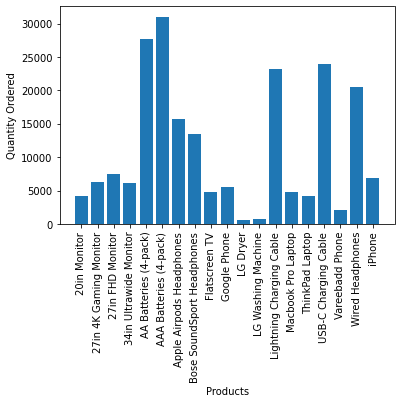

In [156]:
products = product_group.index
plt.bar(products, product_group['Quantity Ordered'])
plt.xticks(products, rotation=90)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

### AAA Batteries are sold the most (They are cheap and in constant need)

In [163]:
### Proving the above statement

prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

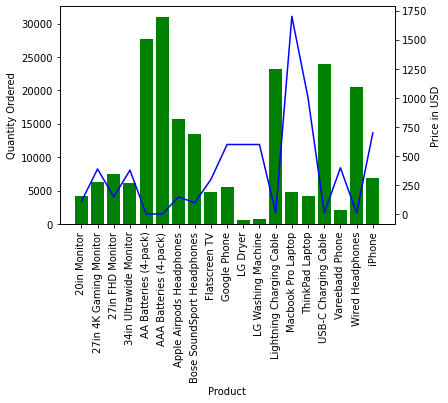

In [197]:
import warnings
warnings.filterwarnings("ignore")


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, product_group['Quantity Ordered'], color='g')
ax2.plot(products, prices, color='b')
ax1.set_xticklabels(products, rotation=90)
ax1.set_xlabel('Product')
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price in USD")
plt.show()

### Price vs Quanity Ordered correlation